<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVM

Supervised classification algorithm

**Background:**
+ To Understand svm, we must understand hyperplanes.
+ Formally,  a hyperplane is an n-1 subspace in an n-dimesnional space.
+ If we wanted to divide a two dimensional space, we'd use a one-dimesnional hyperplane (i.e a line).

**Maximize Margin:**
+ A hyperplane is simply a generalization of that concept into n dimesnions.
+ Support vector machines classify data by finding the hyperplane that maximizes the margin between the classes in the training data.
+ In a two-dimensional example with two classes, we can think of a hyperplane as the widest straight 'band' (i.e line with margins) that separates the two classes.

# Iris dataset (Linear SVC)

In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
X_features = iris.loc[:, iris.columns!='species']
X_features = X_features.columns
X_features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [17]:
X = iris[X_features]
y = iris['species']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
svc = LinearSVC()

In [31]:
model = svc.fit(X_train, y_train)

In [32]:
pred_y = model.predict(X_test)

**Performance Metrics**

In [33]:
from sklearn import metrics

In [34]:
print(metrics.confusion_matrix(y_test, pred_y))

[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


In [35]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# Support vectors

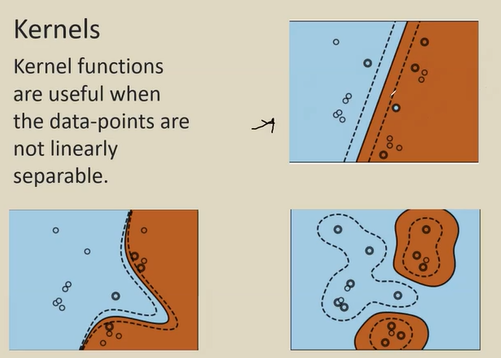

+ Support vectors machines get their name from the fact that the hyperplane is being determined by a relatively small number of observations, called the support vectors.
+ Intuitively, think of the hyperplane as being 'carried' by these support vectors.
+ These support vectors are therefore very important to our model.
+ For eg, if we remove an observation that is not a support vectore from the data, the model does not change;
+ However, if we remove a support vector, the hyperplane will not have the maximum margin.
+ After we have trained an SVC, scikit learn offers us a number of options for identify-ing the support vector.

**RBF parameters:**
+ Radial Basis Function kernel creates a decision boundary that is able to do a much better job of separating classes than the linear kernel.
+ RBF computes decision boundaries in terms of similarity measures in a high-dimensional feature space.
+ Gamma parameter of RBF controls the influence of a single training point.
+ Very large gamma values tend to overfit, very small gamma values tend to underfit. 

**Predicted Probabilites:**
+ SVC's use of a hyperplane to create decision regions does not naturally output a probability estimate that an observation is a member of a certain class.
+ A separate cross-validated logistic regression is trained to map the SVC outputs into probabilities.
+ The predicted probabilities must be generated when the model is being trained. We do this by setting SVC's probability to True.

#Bank Model

In [39]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [40]:
bank_df = pd.read_csv('bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [41]:
from sklearn.utils import resample

In [42]:
bank_subscribed_no = bank_df[bank_df['subscribed']=='no']
bank_subscribed_yes = bank_df[bank_df['subscribed']=='yes']

In [43]:
df_minority_upsampled = resample(bank_subscribed_yes, replace=True, n_samples=2000, random_state=42)

In [44]:
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [45]:
X_features = list(new_bank_df.columns)
X_features.remove('subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [46]:
encoded_bank_df = pd.get_dummies(new_bank_df[X_features], drop_first=True)

In [47]:
X=encoded_bank_df

In [48]:
Y = new_bank_df['subscribed'].map(lambda x:int(x=='yes'))

In [49]:
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.3,random_state=42)

In [51]:
model = SVC(kernel='rbf', random_state=101, gamma=0.001, C=0.1, probability=True)

In [52]:
model.fit(train_X,train_y)

SVC(C=0.1, gamma=0.001, probability=True, random_state=101)

In [53]:
pred_y = model.predict(test_X)

**Predicitons and Performance Metrics**

In [54]:
from sklearn import metrics

In [55]:
print(metrics.confusion_matrix(test_y, pred_y))

[[1220    5]
 [ 558   17]]


In [56]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81      1225
           1       0.77      0.03      0.06       575

    accuracy                           0.69      1800
   macro avg       0.73      0.51      0.43      1800
weighted avg       0.71      0.69      0.57      1800



In [57]:
metrics.roc_auc_score(test_y, model.predict_proba(test_X)[:,1])

0.7146981366459627

**Grid Search CV**

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {'gamma':[0.001, 0.01, 0.1, 1, 1, 1.5, 2.0], 'C':[0.01, 0.1, 1, 2,3]}
modelCV = GridSearchCV(estimator = SVC(), param_grid=params, cv=5, scoring='roc_auc')
modelCV.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2, 3],
                         'gamma': [0.001, 0.01, 0.1, 1, 1, 1.5, 2.0]},
             scoring='roc_auc')

In [60]:
modelCV.best_params_

{'C': 0.1, 'gamma': 2.0}

In [61]:
modelCV.best_score_

0.9458922079974712

**Model with best params**

In [62]:
model = SVC(kernel='rbf', random_state=101, gamma=2, C=0.1, probability=True)
model.fit(train_X, train_y)

SVC(C=0.1, gamma=2, probability=True, random_state=101)

In [63]:
pred_y = model.predict(test_X)

In [64]:
metrics.roc_auc_score(test_y, model.predict_proba(test_X)[:,1])

0.9763251109139306

**Identify Support vectors**

In [65]:
model.support_vectors_

array([[2.500e+01, 7.200e+01, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.900e+01, 0.000e+00, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.800e+01, 3.064e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [5.900e+01, 2.013e+03, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.300e+01, 3.935e+03, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.300e+01, 1.490e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [66]:
model.support_

array([   1,    2,    3, ..., 4196, 4197, 4198], dtype=int32)

In [67]:
model.n_support_

array([2773, 1425], dtype=int32)